In [1]:
#Stock Prediction : Take stock price of any company you want and predicts its price by using LSTM.
#Use only Jupyter notebook code.

In [2]:
!pip install numpy

In [3]:
!pip install pandas

In [4]:
!pip install matplotlib

In [5]:
!pip install tensorflow

In [6]:
!pip install scikit-learn

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
# Load stock price data
data = pd.read_csv('F://Bharat Intern - Task 2023//hindustanunilever.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [9]:
# Choose the column containing the stock prices (e.g., 'Close' column)
price_column = 'Close'
data = data[[price_column]]

In [10]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [11]:
# Define a function to create sequences for the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [12]:
# Set the sequence length (number of previous days to consider)
seq_length = 30

In [13]:
# Create sequences for training
sequences = create_sequences(data_scaled, seq_length)

In [14]:
# Split data into training and testing sets
X = sequences[:, :-1]
y = sequences[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])


Epoch 1/50
28/28 [==============================] - 2s 19ms/step - loss: 0.1389 - val_loss: 0.0059
Epoch 2/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0061 - val_loss: 0.0026
Epoch 3/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 6/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 7/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 8/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
28/28 [==============================] - 0s 10ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 11/

In [18]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 5ms/step


In [19]:
# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [20]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 1495.6171483105281


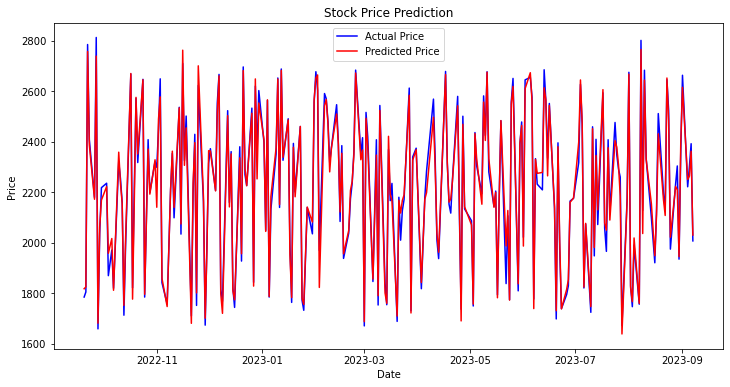

In [21]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted Price', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()